In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [113]:
class Vehicle:
    def __init__(self, position, speed, max_speed, length, width, braking_prob):
        self.position =position
        self.speed=speed
        self.max_speed=max_speed
        self.length=length
        self.width=width
        self.braking_prob=braking_prob

    def accelerate(self):
        if self.speed<self.max_speed:
            self.speed += 1

 #   '''def headway_distance(self, sorted_vehicles): #Clarify this further
  #      next_vehicle_position=min((v.position for v in self.vehicles if v.position>vehicle.position), default=self.length)
   #     return next_vehicle_position - vehicle'''
    #    '''lo = 0
     #   hi = len(sorted_vehicles) - 1
    #
     #   while lo <= hi: #BINARY SEARCH
      #      mid = (lo + hi) // 2
       #     if sorted_vehicles[mid].position > self.position:
                hi = mid - 1
        #    else:
         #       lo = mid + 1
            
       # if lo < len(sorted_vehicles):
     #       next_car_position = sorted_vehicles[lo].position
        #else:
         #   next_car_position = self.position + self.length
    
        #return next_car_position - (self.position - self.length) #clarify this later'''

    def decelerate(self, headway_distance):
        if self.speed>headway_distance:
            self.speed=headway_distance #reduce speed equivalent to headway distance

    def random_brake(self, braking_prob):
        if np.random.rand()<braking_prob and self.speed>0:
            self.speed-=1    

In [ ]:
#Test (Just testing)
vehicle=Vehicle(0, 2, 5, 2, 2, 0.6)
print(vehicle.position)
print(vehicle.speed)
print(vehicle.braking_prob)

In [135]:
class Road:
    def __init__(self, length, width, max_speed, production_prob):
        '''This initalizes the characteristics and dynamics of the road'''
        self.length=length
        self.width=width
        self.max_speed=max_speed
        self.production_prob=production_prob
        self.vehicles=[] #Road array
        
    ''' Headway distance for which vehicle? '''
    def headway_distance(self, the_vehicle): 
        ''' Vehicle Position is the position of its rear end'''
        ''' Calculate distance between two consecutive vehicles (Vehicle_Ahead_Rear - vehicle_of_focus_FRONT)'''
        distance=[] 
        for other_vehicle in self.vehicles:
            if other_vehicle.position>the_vehicle.position+the_vehicle.length:
                distance.append(other_vehicle.position - (the_vehicle.position+the_vehicle.length))
        return min(distance, default=self.length-(the_vehicle.position+the_vehicle.length))

    '''def vehicle_presence(self, occupying_vehicle):
        This method determines if there is a vehicle present on the first {vehicle.length} cells on self.vehicles(Road array)
        if''' #To be worked out soon
        
    def produce_vehicles(self, production_prob):
        ''' 
        Figure out if there's space at position[0] to (if free, allow append. 
        If it's not free, you cannot produce. ) 
        You have to satisfy the condition (Is it the time to produce car? Yes.
        '''
        
        if np.random.rand()<self.production_prob: # check if vehicle is initialized by the call
            vehicle_length = np.random.choice([1,2,5,9]) # Pick how long the vehicle is
            if vehicle_length == 1: # Only motorcycles (1-long) are 1-wide
                vehicle_width=1
            else:
                vehicle_width=2
            # Check if space is present from pos[0] to pos[0+vehicle_length]
            if all(vehicle is None for vehicle in self.vehicles[0:vehicle_length]):         
                # Space present; proceed with initializing vehicle and adding to system
                new_vehicle=Vehicle(0, np.random.randint(1, self.max_speed+1), self.max_speed, vehicle_length, vehicle_width, braking_prob=0.5)
                self.vehicles.append(new_vehicle)
            else: # Space not present
                pass

    ''' make a method: Is there a vehicle at position[0]:position[vehicle.length]? '''

    def remove_vehicles(self): #another portion that is inefficient
        self.vehicles=[vehicle for vehicle in self.vehicles if vehicle.position !=self.length]

    def update(self):
        new_vehicles=[]
        for vehicle in self.vehicles:
            headway = vehicle.headway_distance(self.vehicles)
            vehicle.accelerate()
            vehicle.decelerate(headway)
            vehicle.random_brake(braking_prob=0.4)
            new_position = vehicle.position + vehicle.speed
            if new_position < self.length - 1:
                vehicle.position=new_position
                new_vehicles.append(vehicle)
        self.vehicles = new_vehicles
        self.produce_vehicles(production_prob)
        self.remove_vehicles()

    def get_road_state(self):
        road_state = np.zeros((self.length, self.width), dtype=int)
        for vehicle in self.vehicles:
            for i in range(vehicle.width):
                for j in range(vehicle.length):
                    if vehicle.position + j < self.length:
                        road_state[vehicle.position + j, i] = 1
                    else:
                        break
                    #Position nung vehicle plus yung nasa harap niya ayung occupied. In short, ang dulo ng vehicle ay indicated ng kaniyang position
        return road_state

In [124]:
#DIFFERENT VISUALIZATIONS AHEAD(WILL TRANSFER TO ANOTHER NB IF IT WORKS)

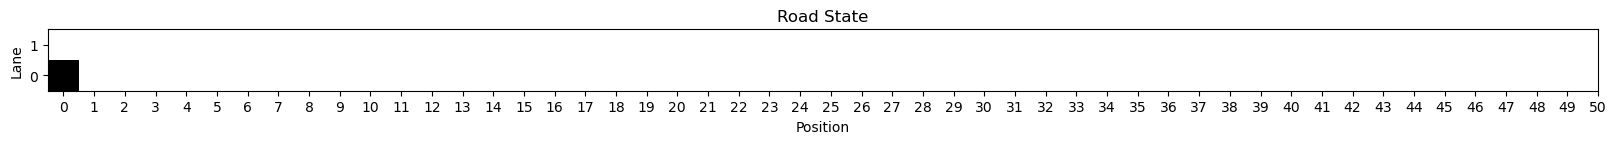

Vehicles:
Position: 0, Speed: 5, Length:1



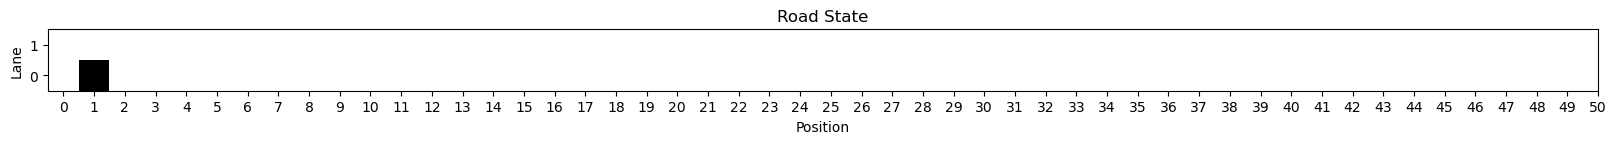

Vehicles:
Position: 1, Speed: 1, Length:1



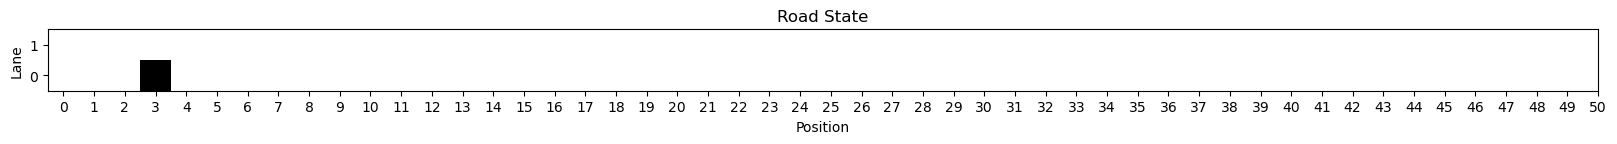

Vehicles:
Position: 3, Speed: 2, Length:1



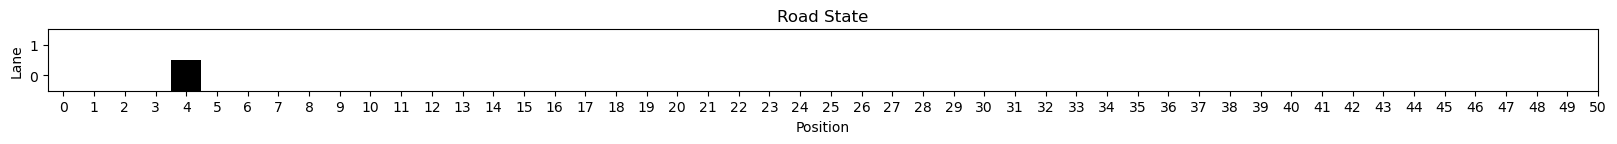

Vehicles:
Position: 4, Speed: 1, Length:1



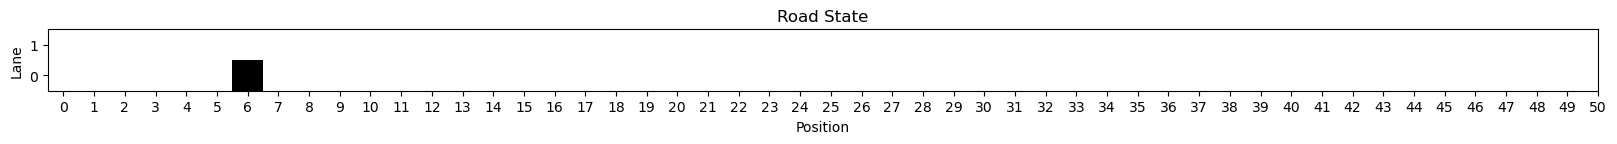

Vehicles:
Position: 6, Speed: 2, Length:1



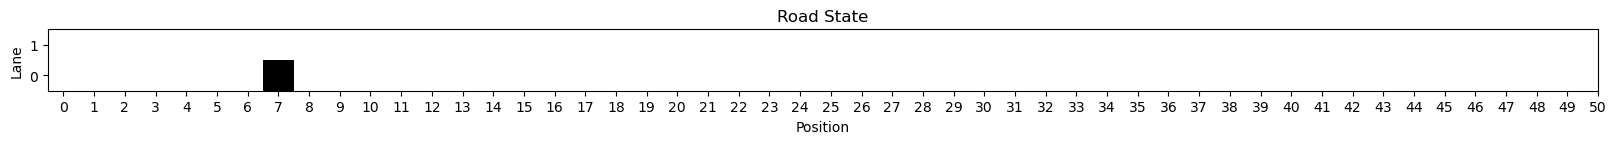

Vehicles:
Position: 7, Speed: 1, Length:1



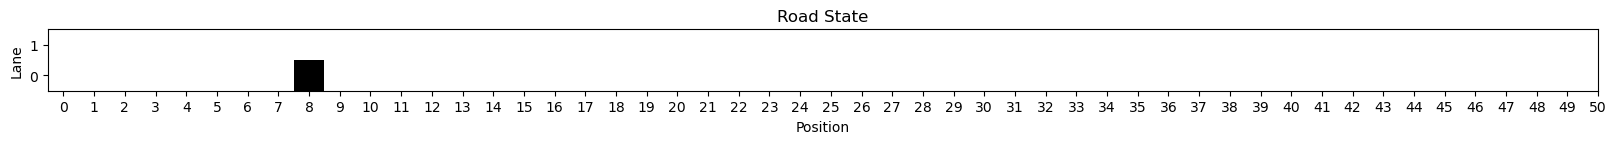

Vehicles:
Position: 8, Speed: 1, Length:1



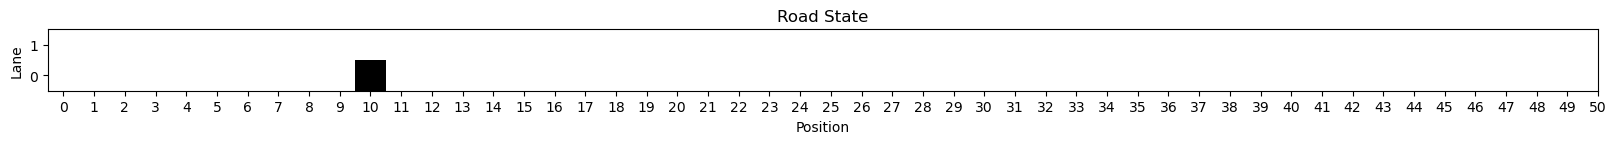

Vehicles:
Position: 10, Speed: 2, Length:1



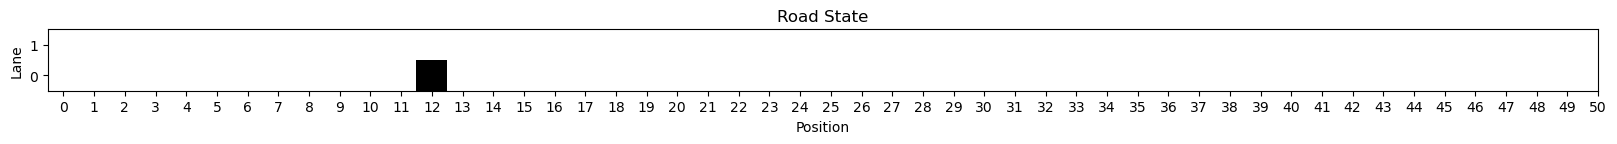

Vehicles:
Position: 12, Speed: 2, Length:1



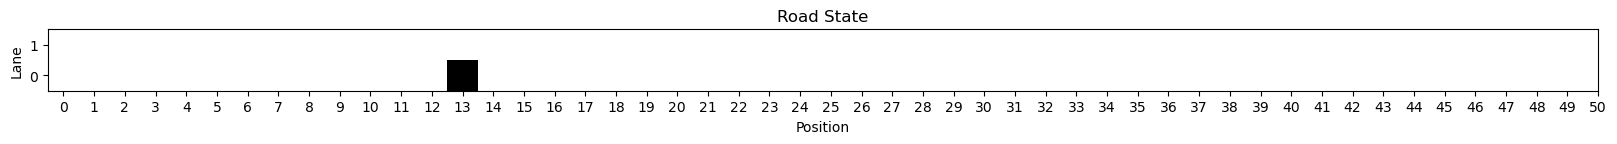

Vehicles:
Position: 13, Speed: 1, Length:1



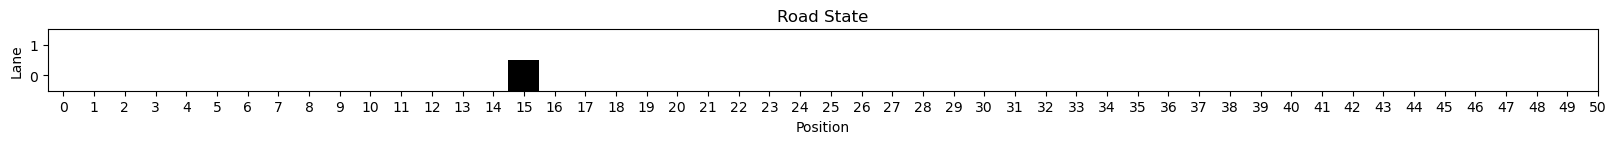

Vehicles:
Position: 15, Speed: 2, Length:1



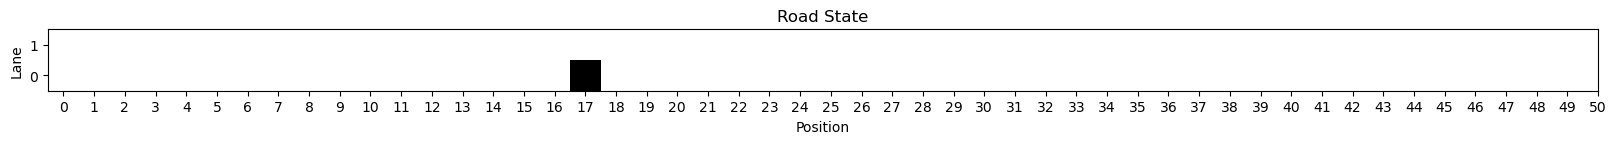

Vehicles:
Position: 17, Speed: 2, Length:1



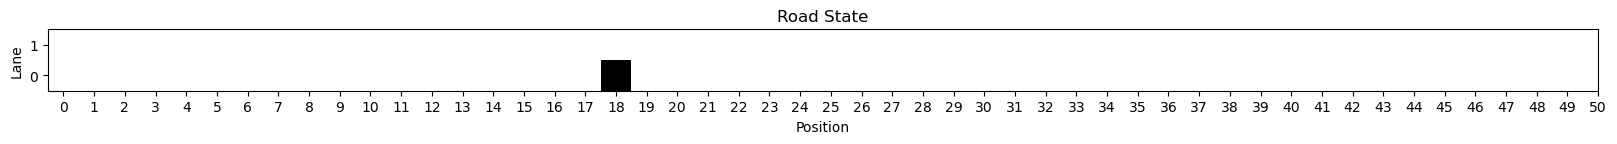

Vehicles:
Position: 18, Speed: 1, Length:1



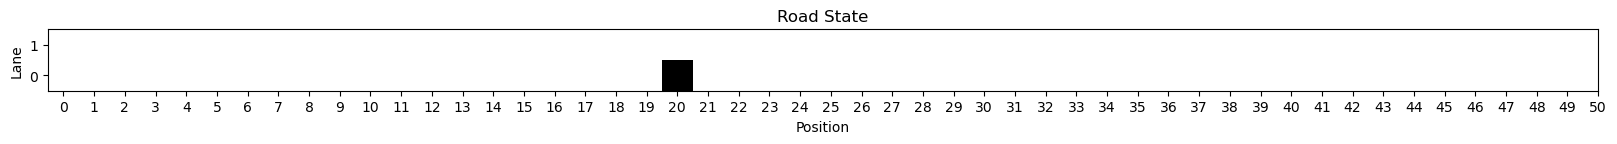

Vehicles:
Position: 20, Speed: 2, Length:1



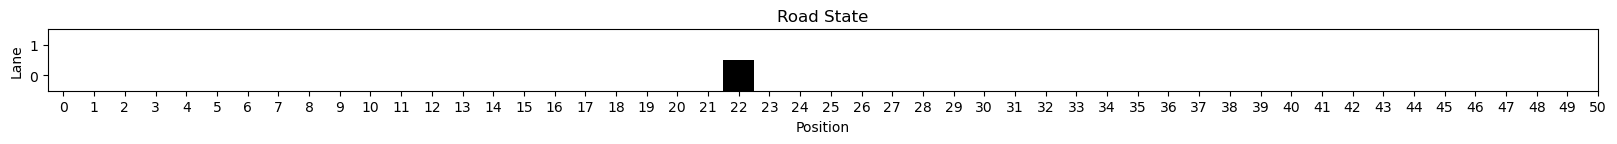

Vehicles:
Position: 22, Speed: 2, Length:1



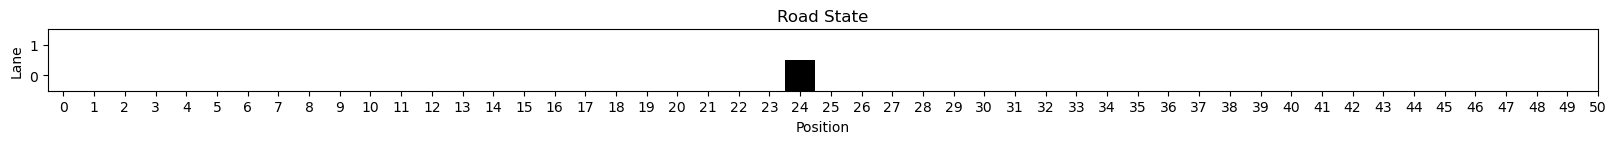

Vehicles:
Position: 24, Speed: 2, Length:1



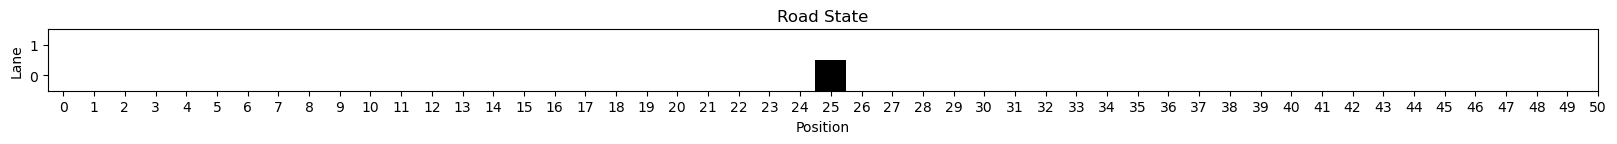

Vehicles:
Position: 25, Speed: 1, Length:1



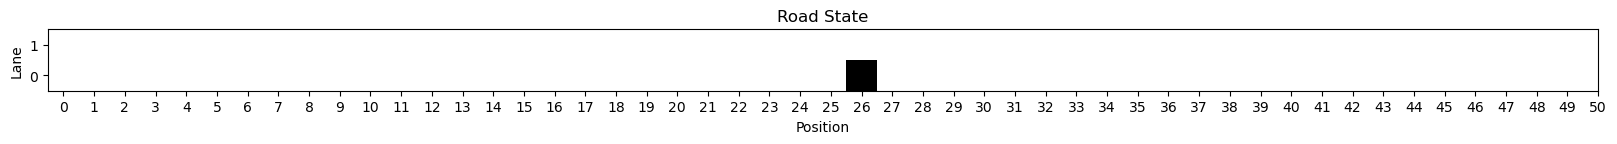

Vehicles:
Position: 26, Speed: 1, Length:1



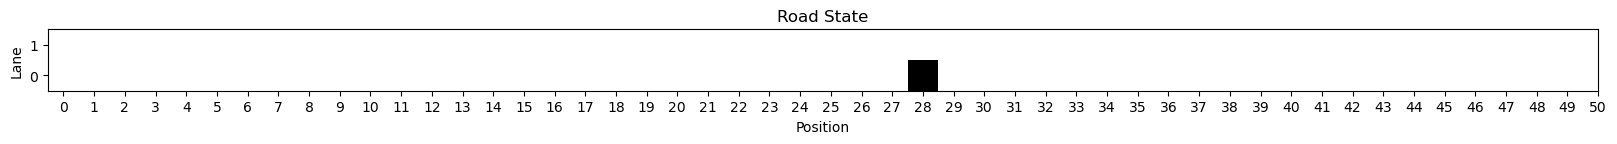

Vehicles:
Position: 28, Speed: 2, Length:1



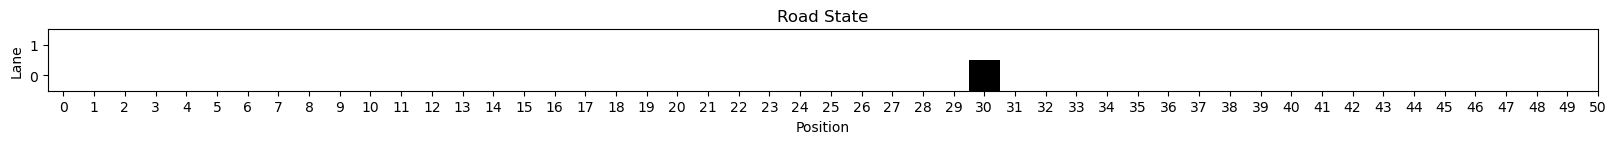

Vehicles:
Position: 30, Speed: 2, Length:1



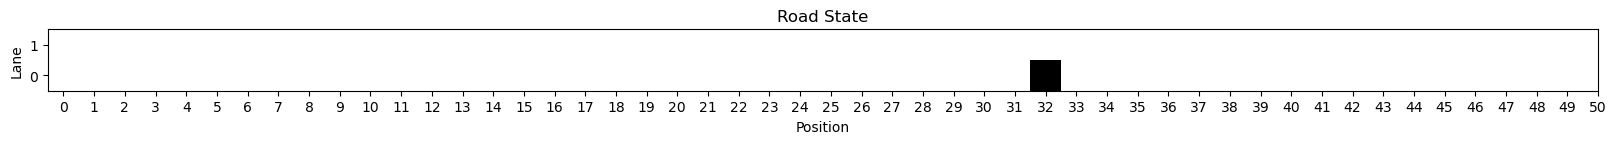

Vehicles:
Position: 32, Speed: 2, Length:1



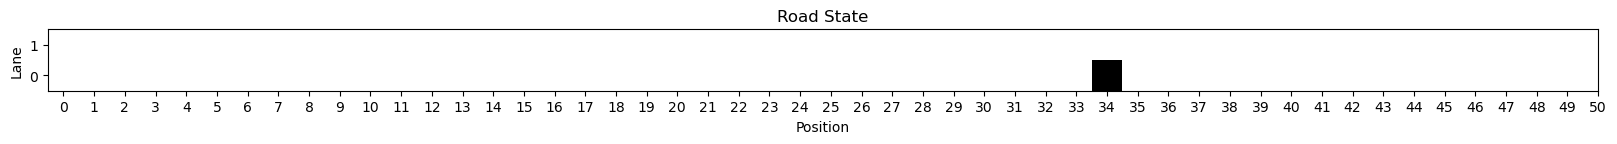

Vehicles:
Position: 34, Speed: 2, Length:1



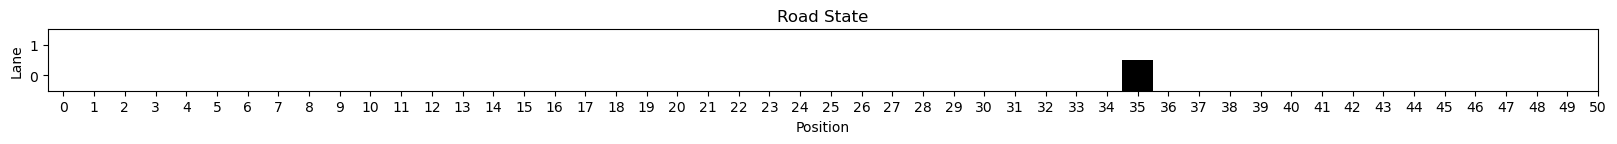

Vehicles:
Position: 35, Speed: 1, Length:1



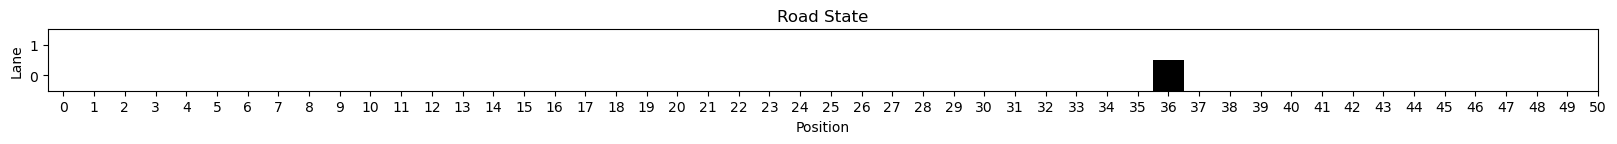

Vehicles:
Position: 36, Speed: 1, Length:1



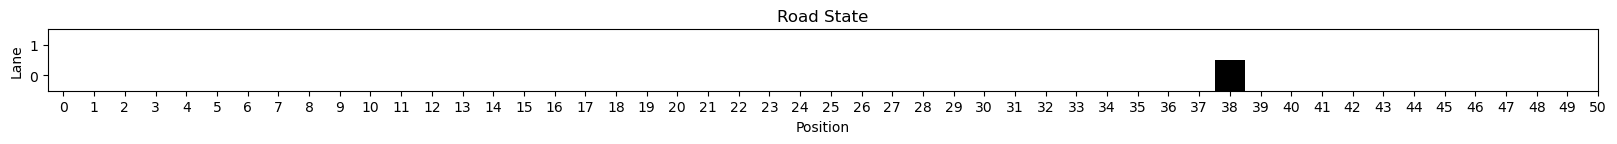

Vehicles:
Position: 38, Speed: 2, Length:1



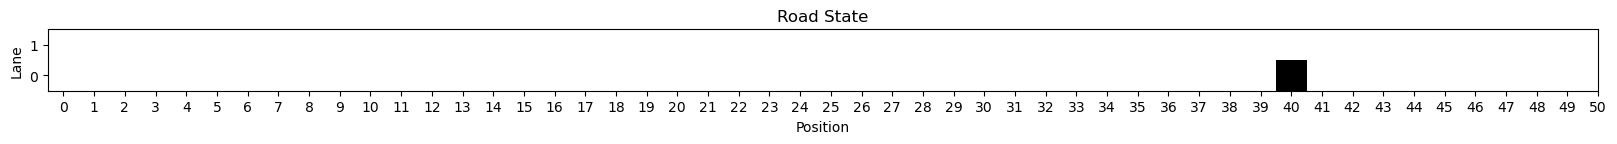

Vehicles:
Position: 40, Speed: 2, Length:1



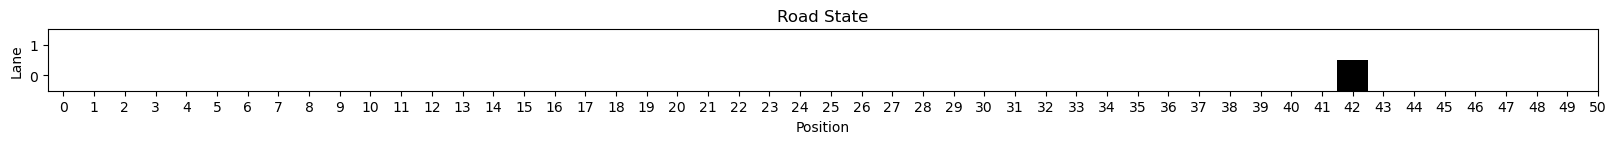

Vehicles:
Position: 42, Speed: 2, Length:1



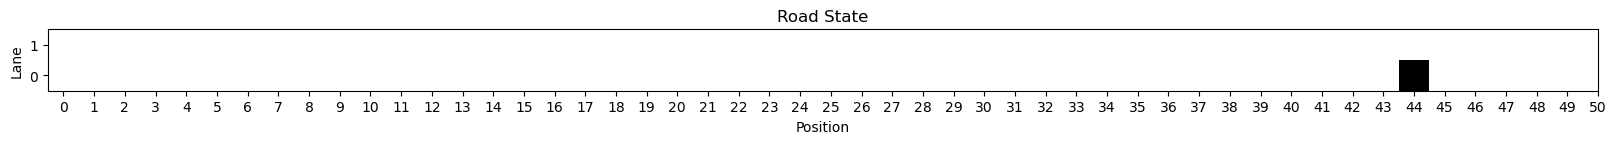

Vehicles:
Position: 44, Speed: 2, Length:1



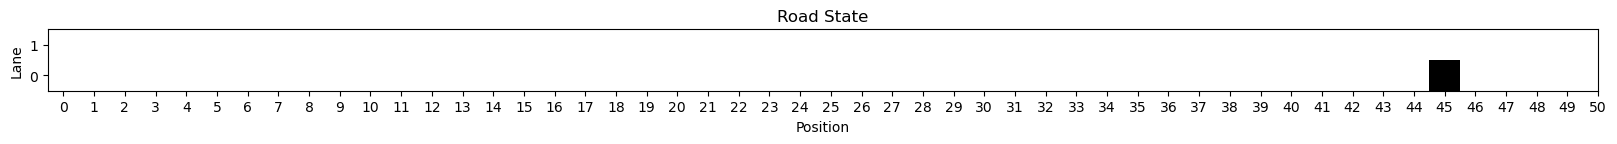

Vehicles:
Position: 45, Speed: 1, Length:1



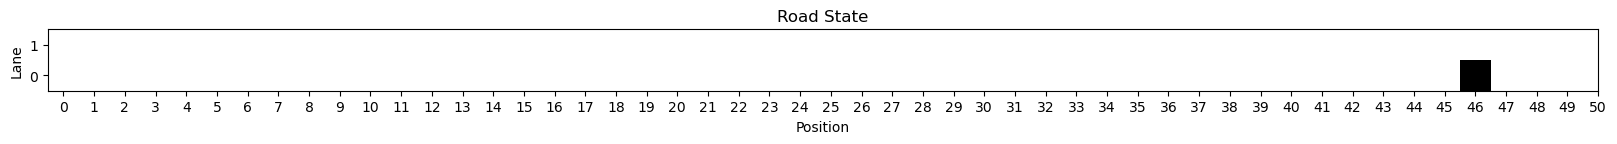

Vehicles:
Position: 46, Speed: 1, Length:1



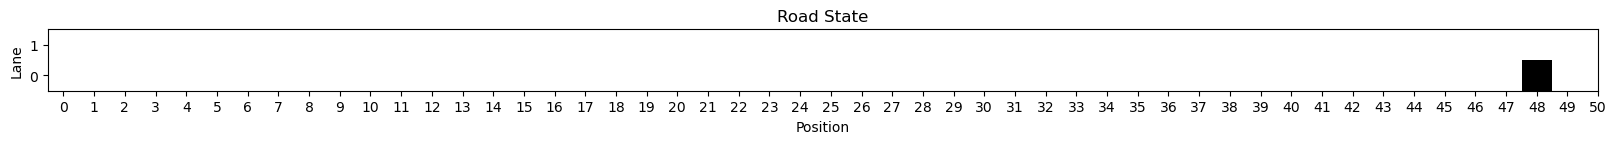

Vehicles:
Position: 48, Speed: 2, Length:1



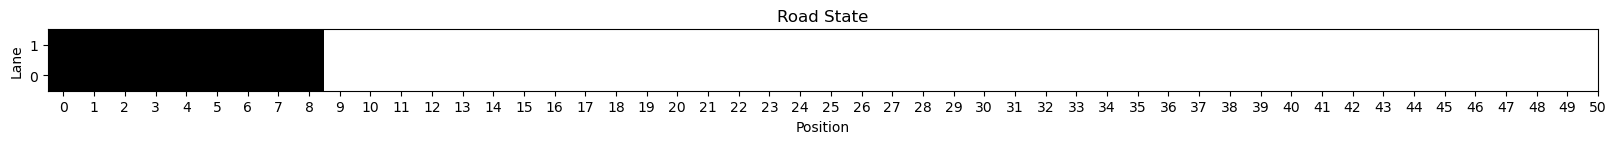

Vehicles:
Position: 0, Speed: 4, Length:9



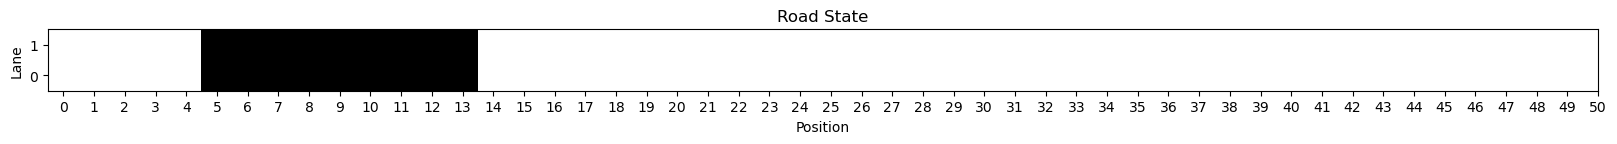

Vehicles:
Position: 5, Speed: 5, Length:9



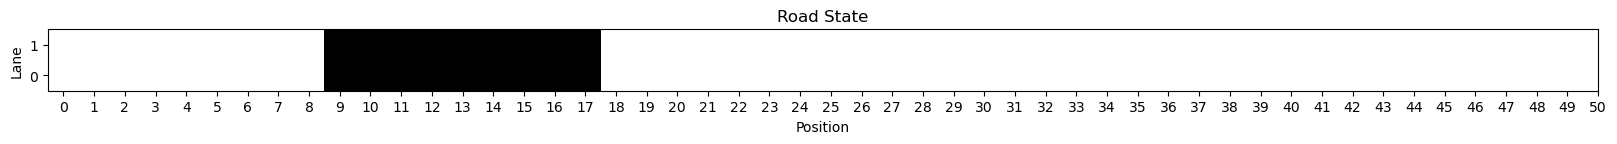

Vehicles:
Position: 9, Speed: 4, Length:9



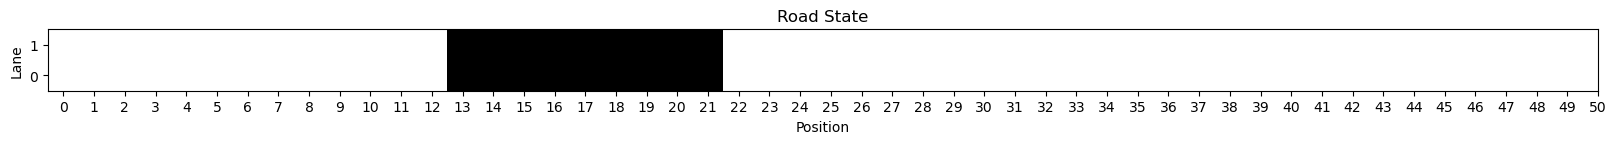

Vehicles:
Position: 13, Speed: 4, Length:9



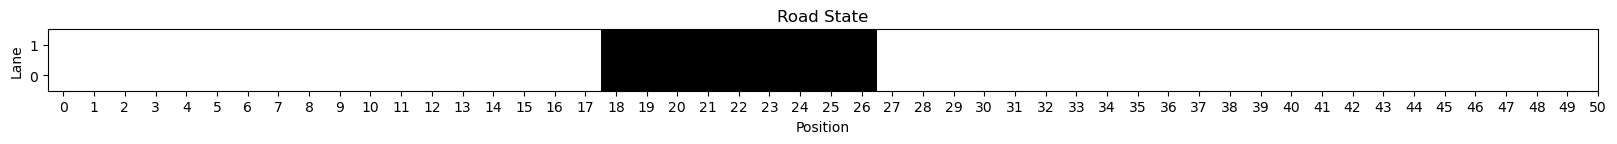

Vehicles:
Position: 18, Speed: 5, Length:9



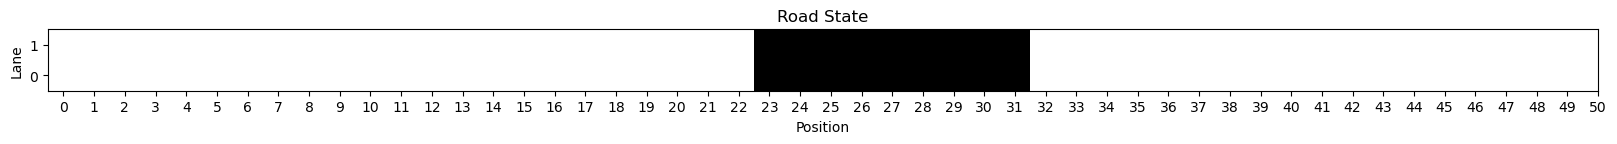

Vehicles:
Position: 23, Speed: 5, Length:9



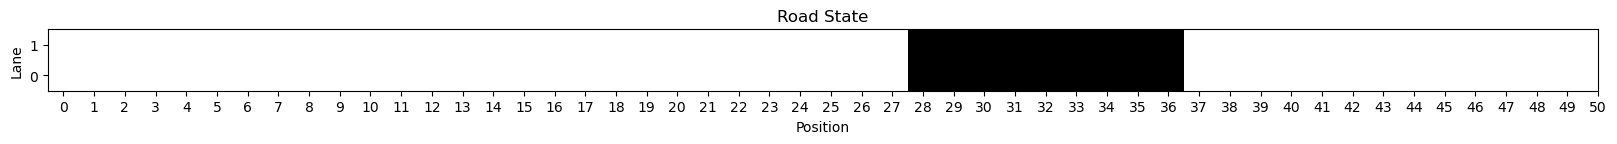

Vehicles:
Position: 28, Speed: 5, Length:9



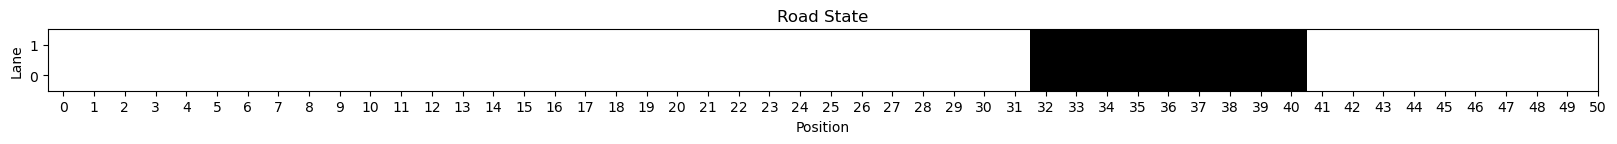

Vehicles:
Position: 32, Speed: 4, Length:9



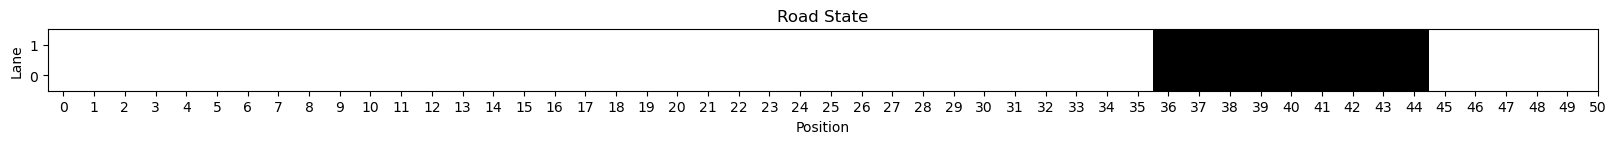

Vehicles:
Position: 36, Speed: 4, Length:9



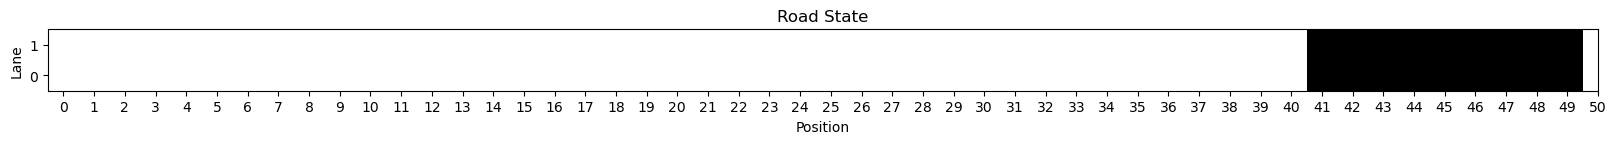

Vehicles:
Position: 41, Speed: 5, Length:9



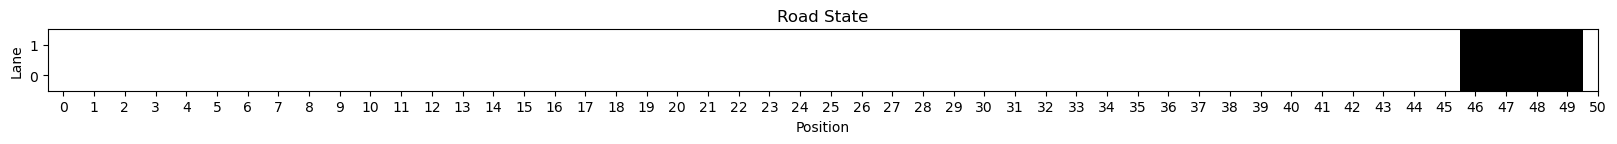

Vehicles:
Position: 46, Speed: 5, Length:9



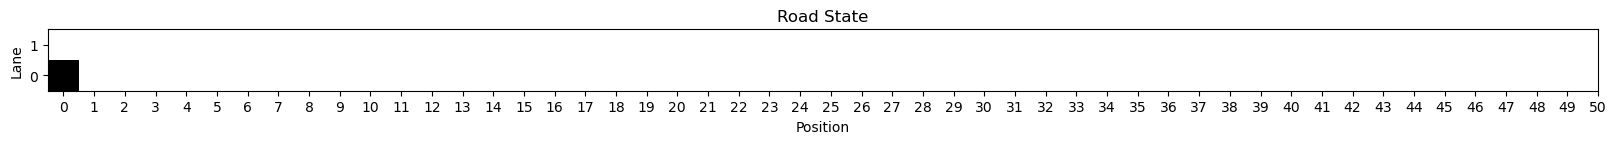

Vehicles:
Position: 0, Speed: 5, Length:1



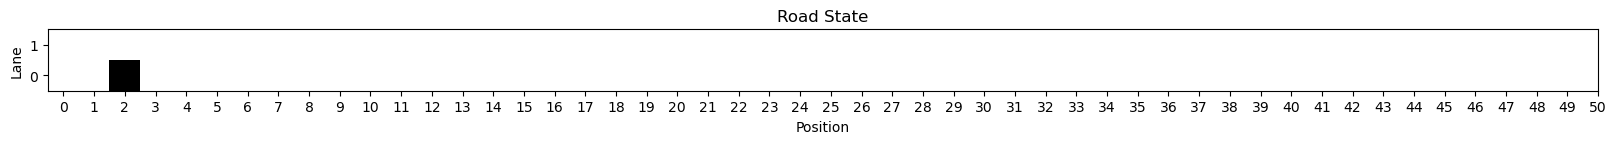

Vehicles:
Position: 2, Speed: 2, Length:1



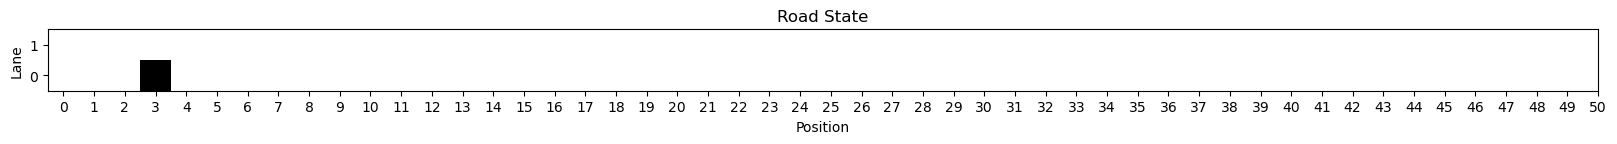

Vehicles:
Position: 3, Speed: 1, Length:1



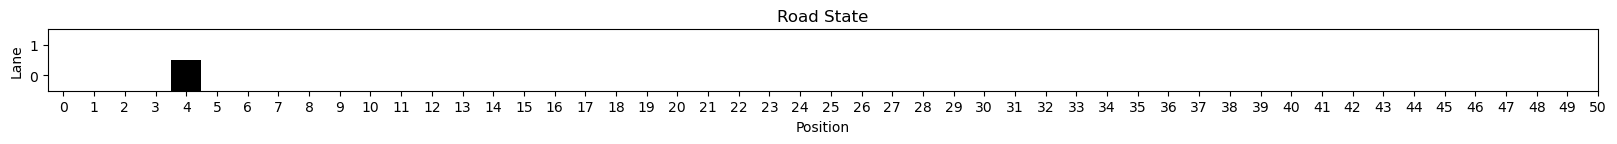

Vehicles:
Position: 4, Speed: 1, Length:1



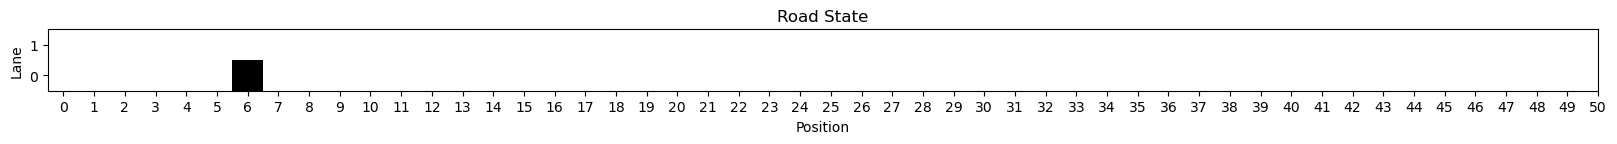

Vehicles:
Position: 6, Speed: 2, Length:1



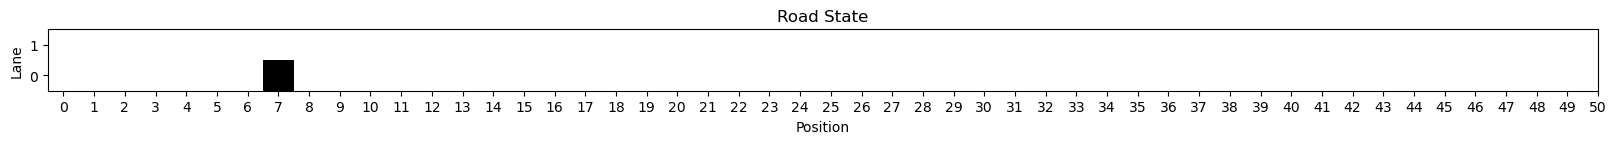

Vehicles:
Position: 7, Speed: 1, Length:1



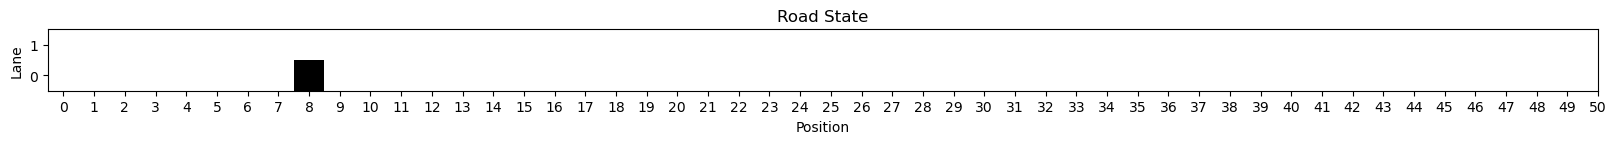

Vehicles:
Position: 8, Speed: 1, Length:1



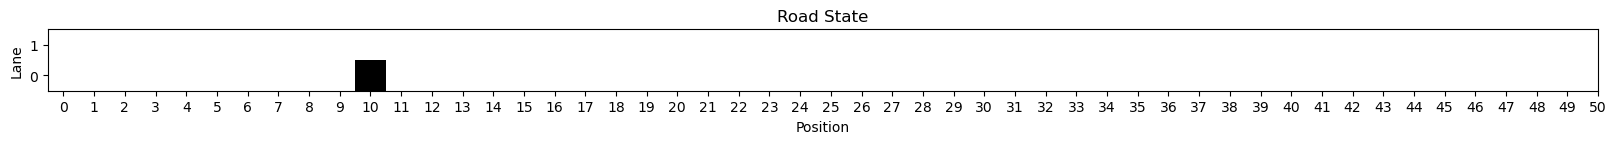

Vehicles:
Position: 10, Speed: 2, Length:1



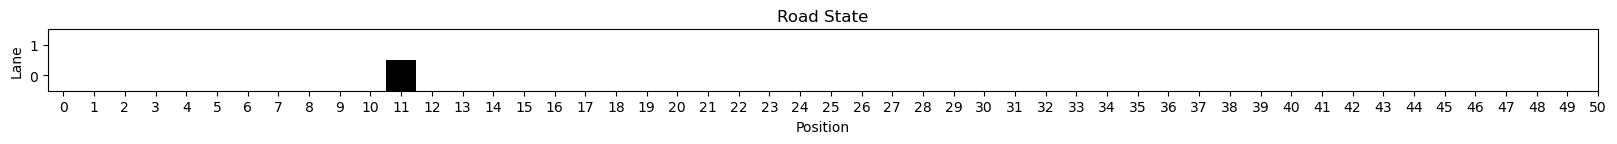

Vehicles:
Position: 11, Speed: 1, Length:1



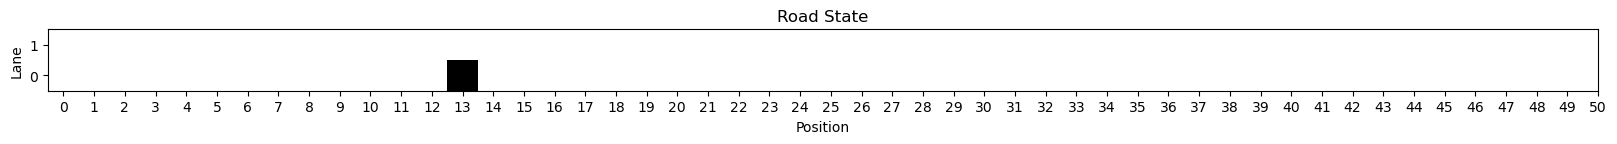

Vehicles:
Position: 13, Speed: 2, Length:1



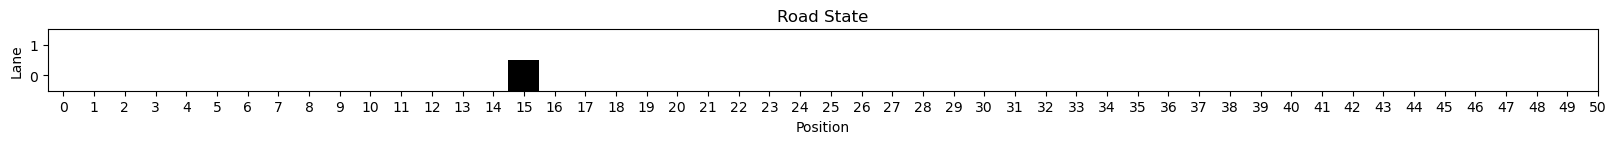

Vehicles:
Position: 15, Speed: 2, Length:1



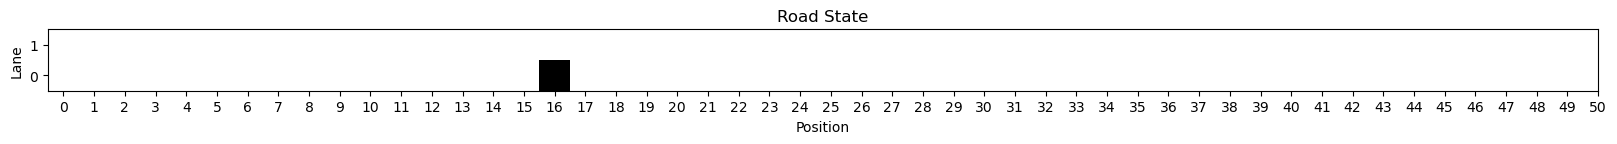

Vehicles:
Position: 16, Speed: 1, Length:1



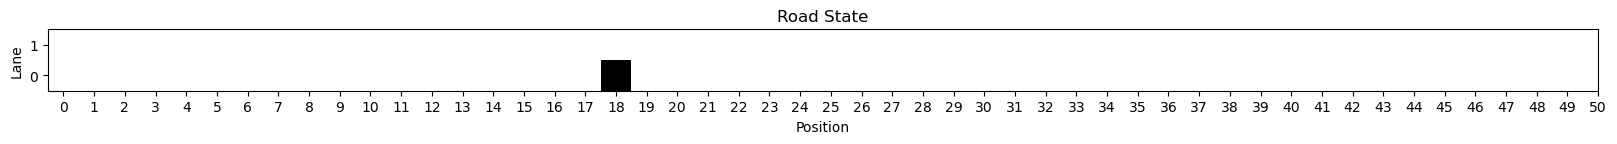

Vehicles:
Position: 18, Speed: 2, Length:1



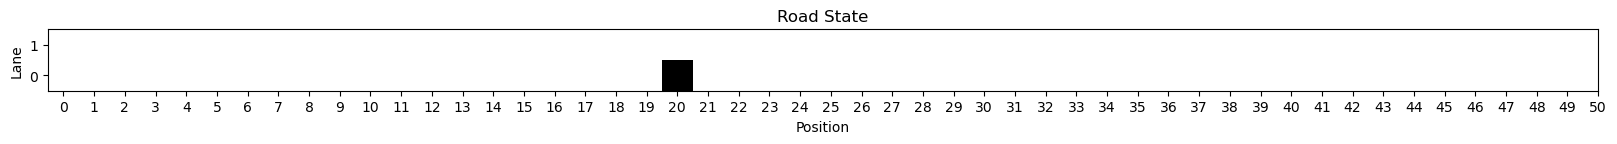

Vehicles:
Position: 20, Speed: 2, Length:1



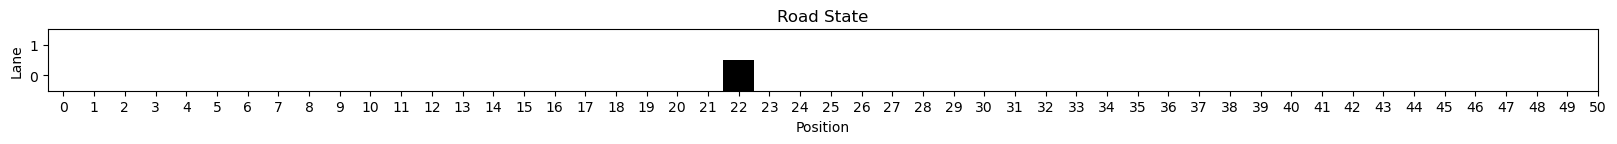

Vehicles:
Position: 22, Speed: 2, Length:1



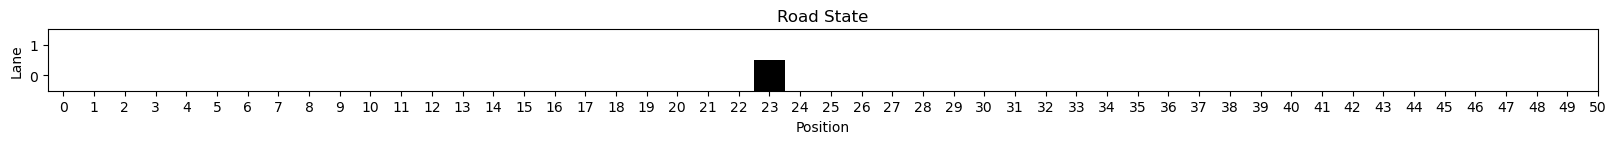

Vehicles:
Position: 23, Speed: 1, Length:1



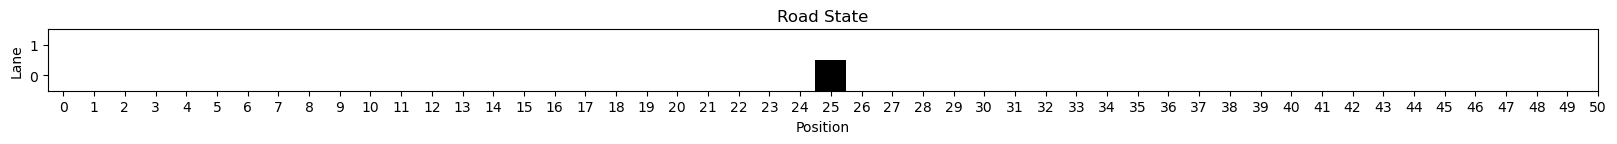

Vehicles:
Position: 25, Speed: 2, Length:1



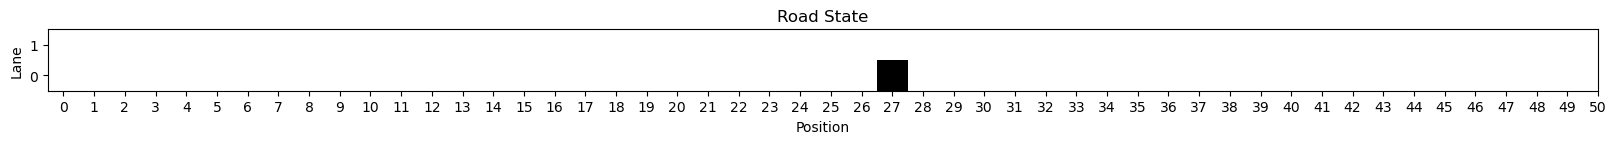

Vehicles:
Position: 27, Speed: 2, Length:1



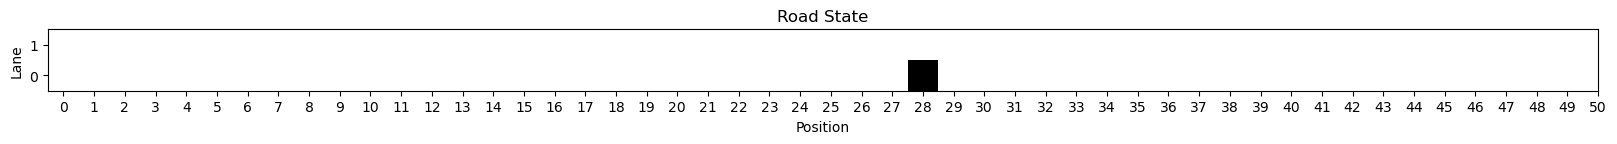

Vehicles:
Position: 28, Speed: 1, Length:1



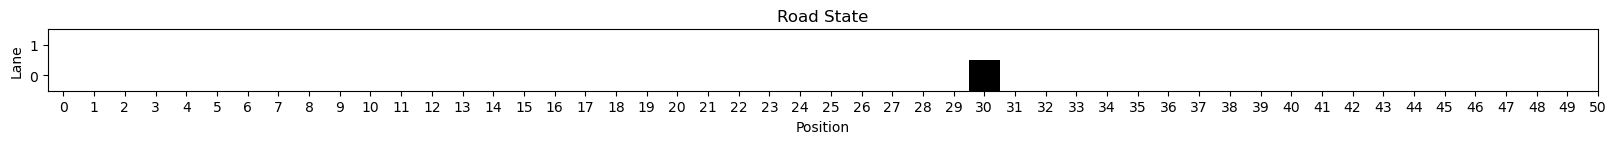

Vehicles:
Position: 30, Speed: 2, Length:1



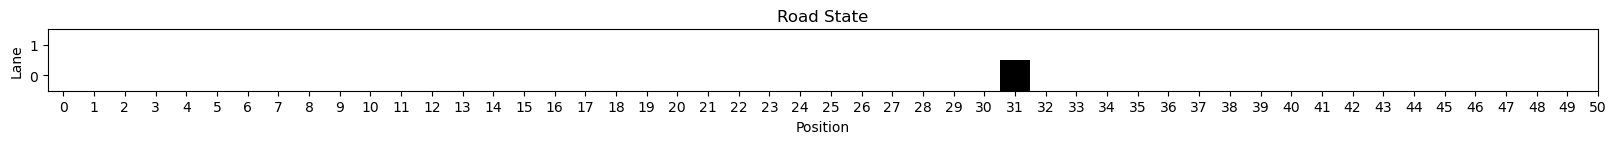

Vehicles:
Position: 31, Speed: 1, Length:1



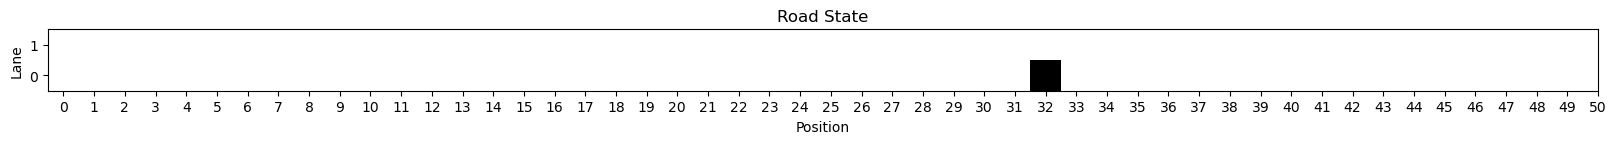

Vehicles:
Position: 32, Speed: 1, Length:1



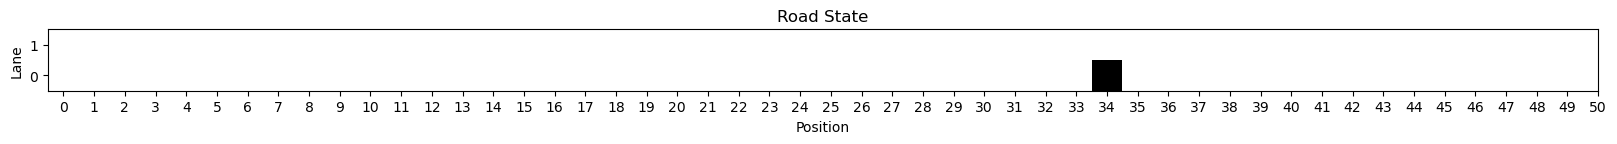

Vehicles:
Position: 34, Speed: 2, Length:1



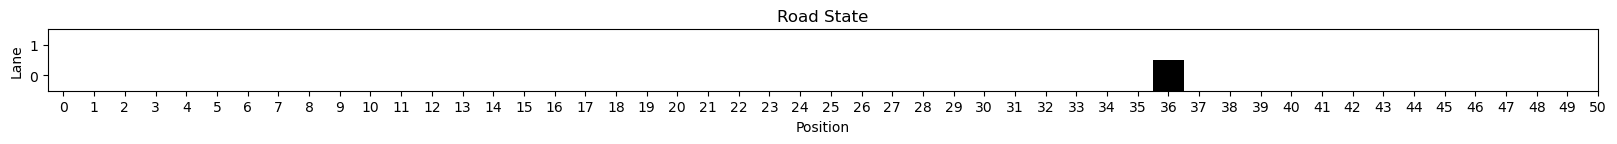

Vehicles:
Position: 36, Speed: 2, Length:1



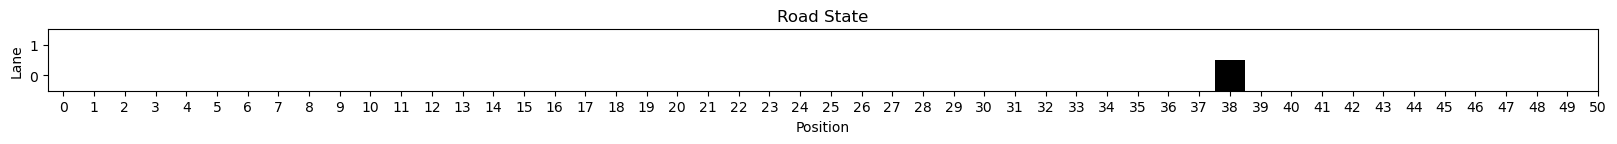

Vehicles:
Position: 38, Speed: 2, Length:1



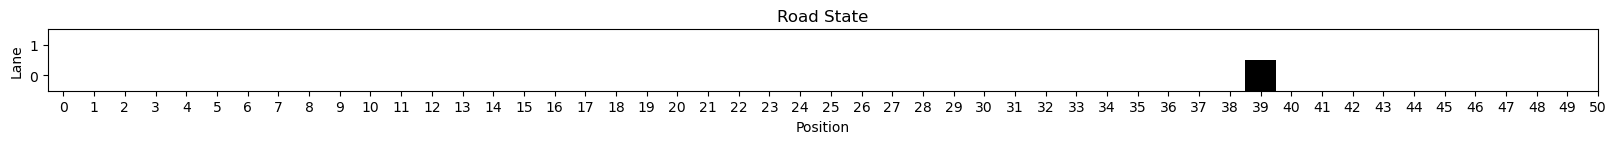

Vehicles:
Position: 39, Speed: 1, Length:1



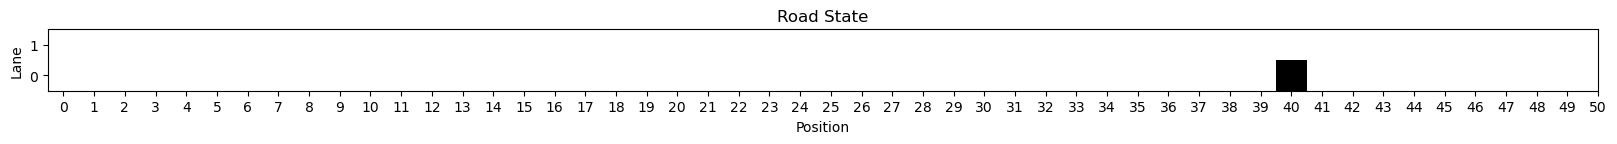

Vehicles:
Position: 40, Speed: 1, Length:1



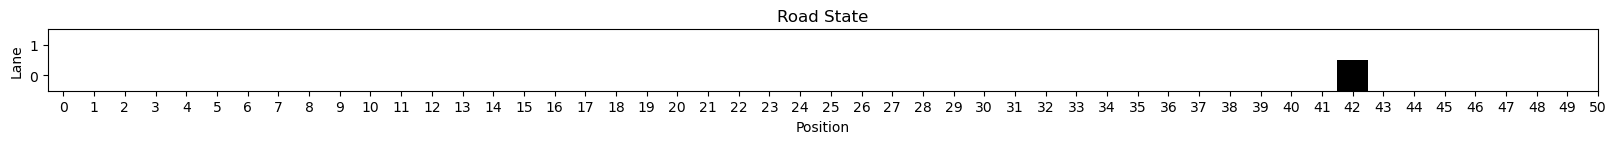

Vehicles:
Position: 42, Speed: 2, Length:1



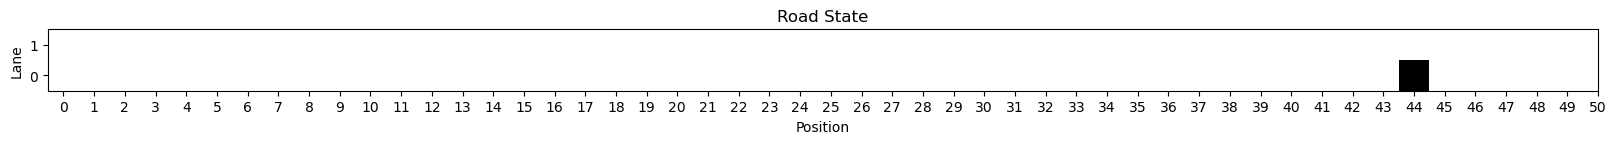

Vehicles:
Position: 44, Speed: 2, Length:1



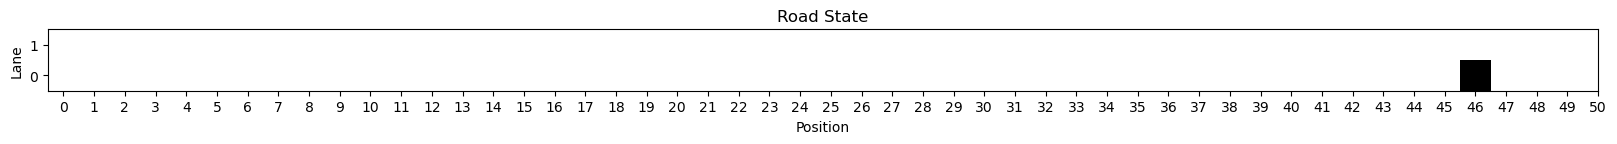

Vehicles:
Position: 46, Speed: 2, Length:1



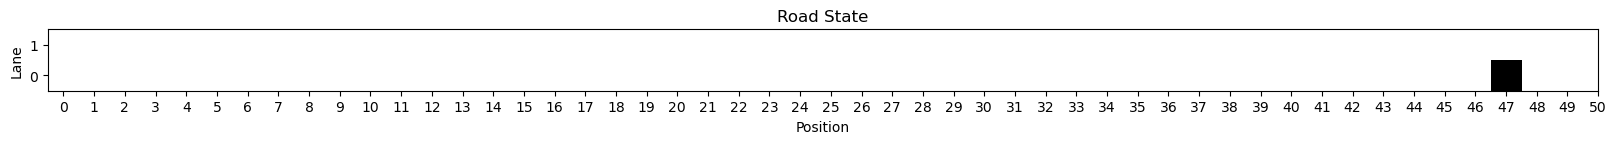

Vehicles:
Position: 47, Speed: 1, Length:1



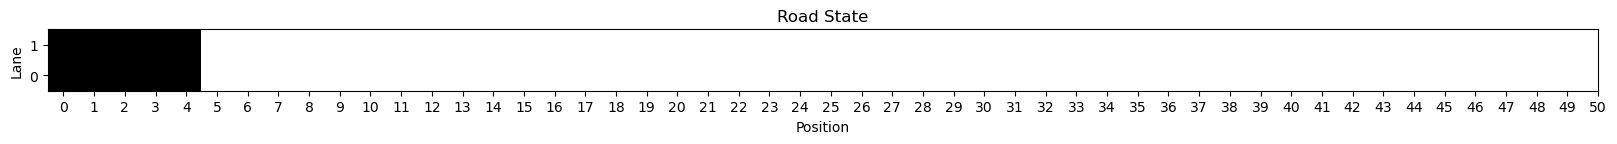

Vehicles:
Position: 0, Speed: 2, Length:5



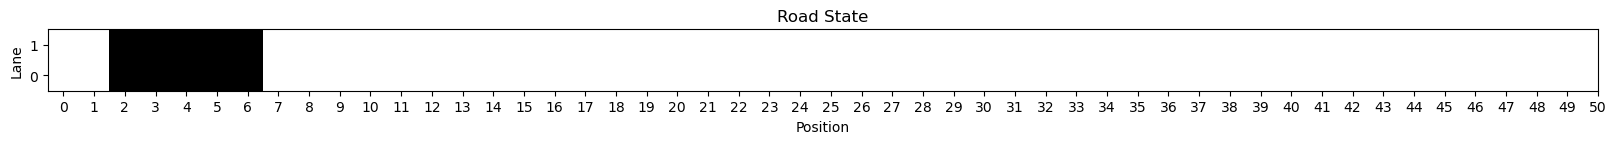

Vehicles:
Position: 2, Speed: 2, Length:5



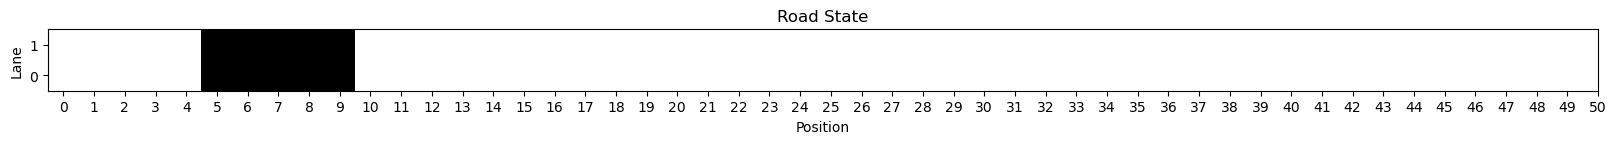

Vehicles:
Position: 5, Speed: 3, Length:5



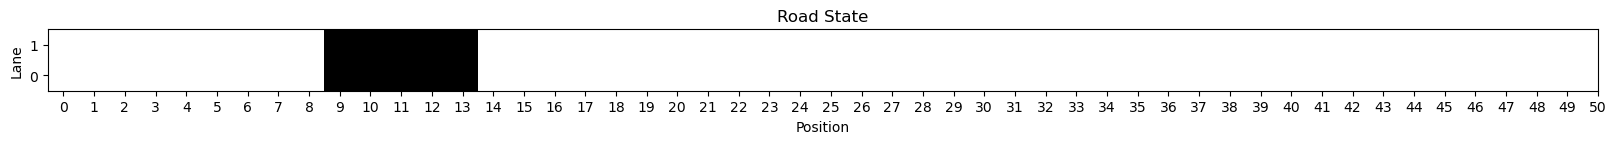

Vehicles:
Position: 9, Speed: 4, Length:5



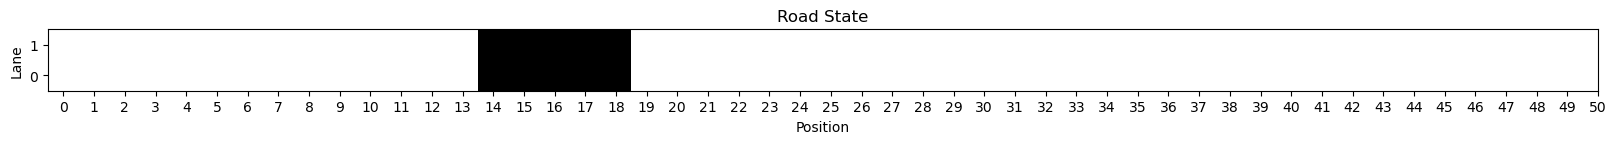

Vehicles:
Position: 14, Speed: 5, Length:5



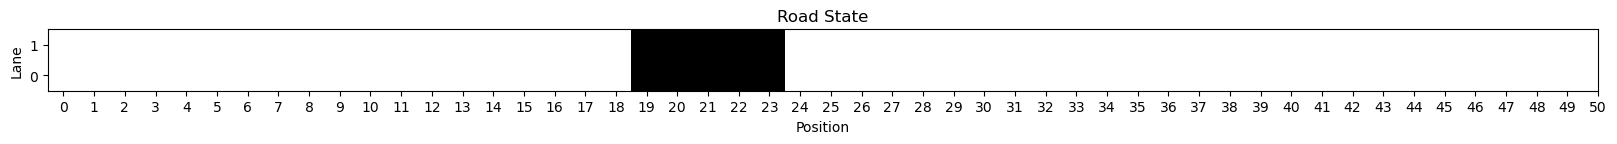

Vehicles:
Position: 19, Speed: 5, Length:5



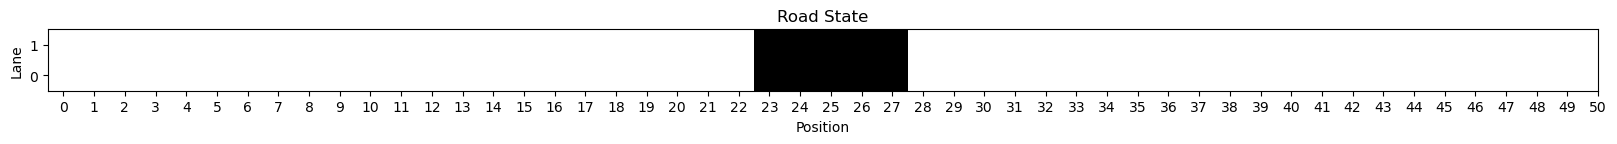

Vehicles:
Position: 23, Speed: 4, Length:5



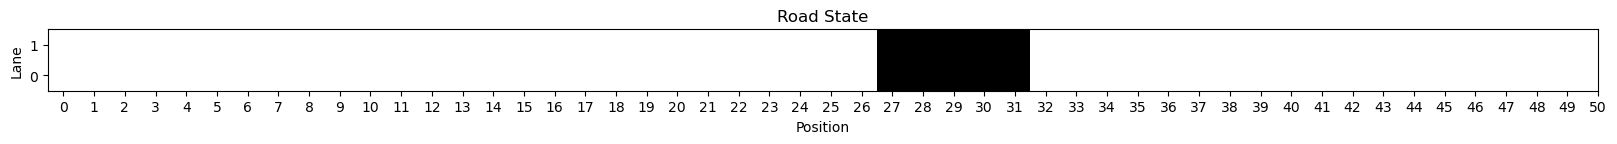

Vehicles:
Position: 27, Speed: 4, Length:5



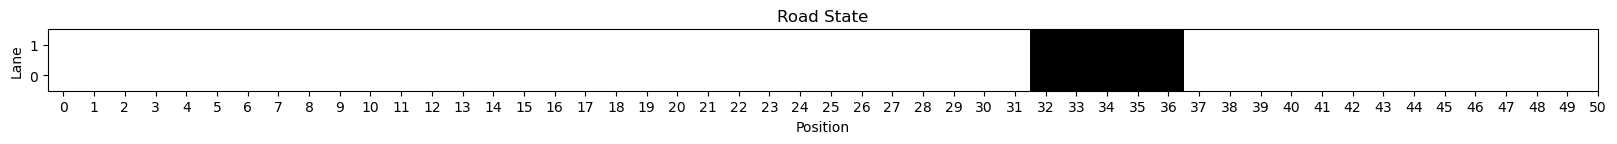

Vehicles:
Position: 32, Speed: 5, Length:5



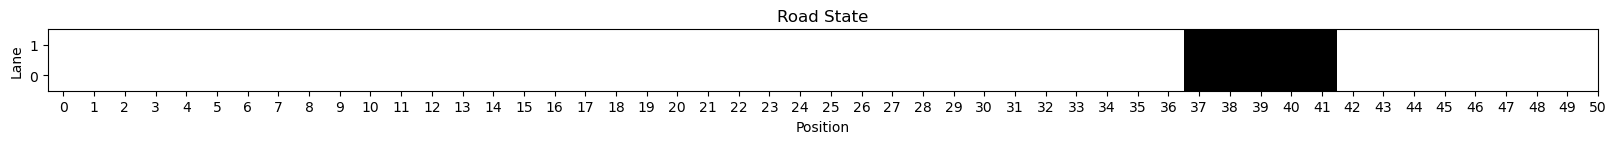

Vehicles:
Position: 37, Speed: 5, Length:5



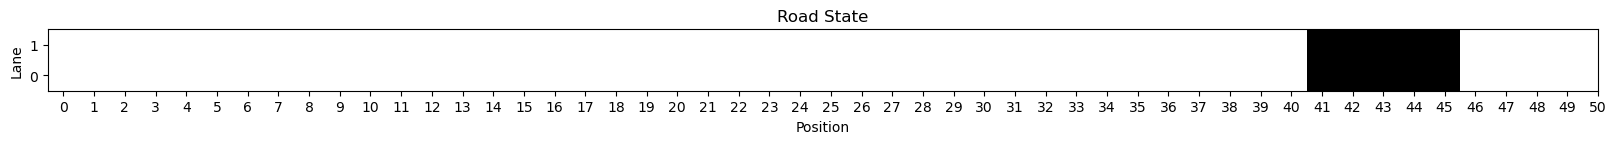

Vehicles:
Position: 41, Speed: 4, Length:5



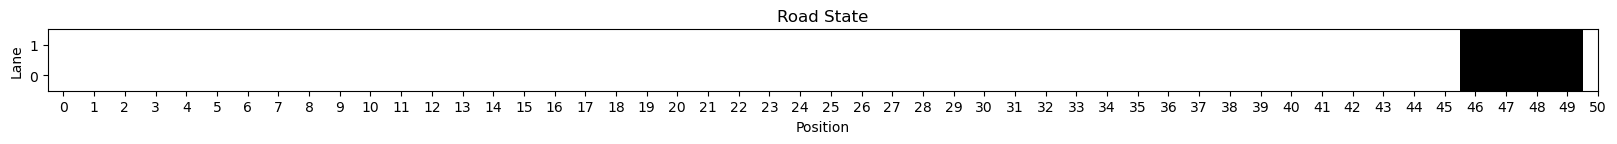

Vehicles:
Position: 46, Speed: 5, Length:5



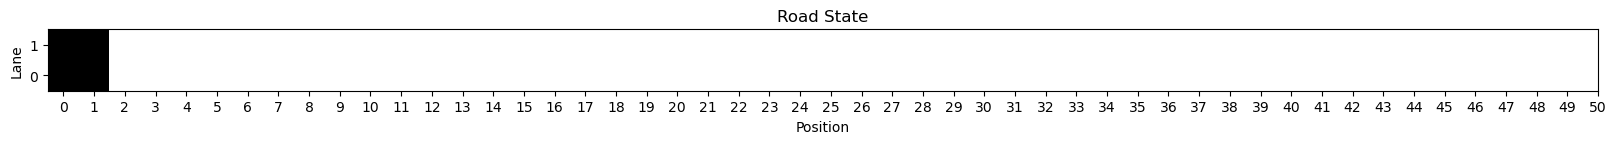

Vehicles:
Position: 0, Speed: 2, Length:2



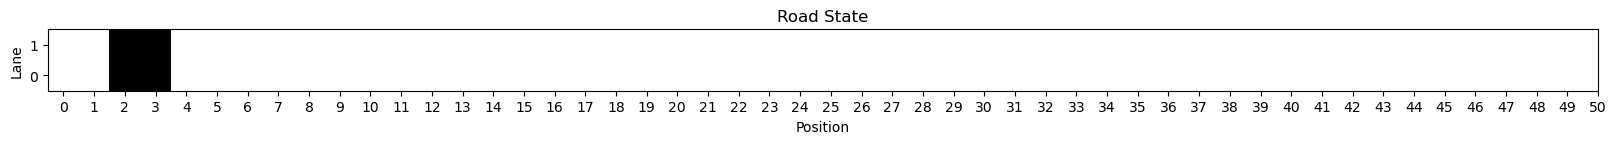

Vehicles:
Position: 2, Speed: 2, Length:2



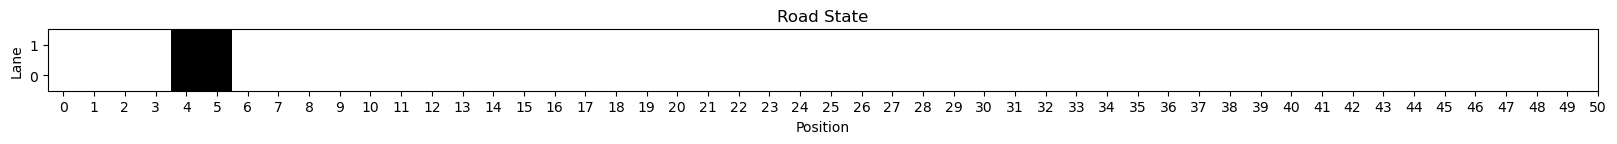

Vehicles:
Position: 4, Speed: 2, Length:2



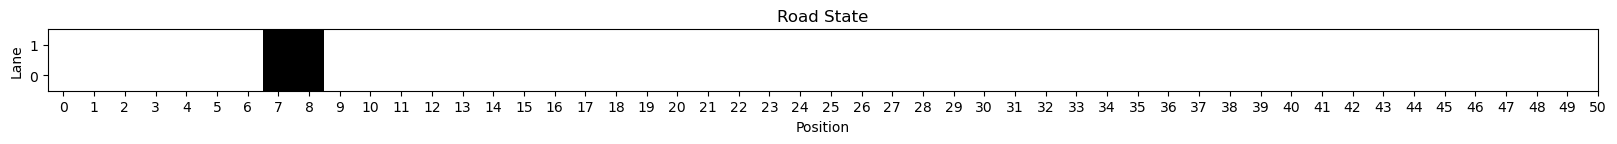

Vehicles:
Position: 7, Speed: 3, Length:2



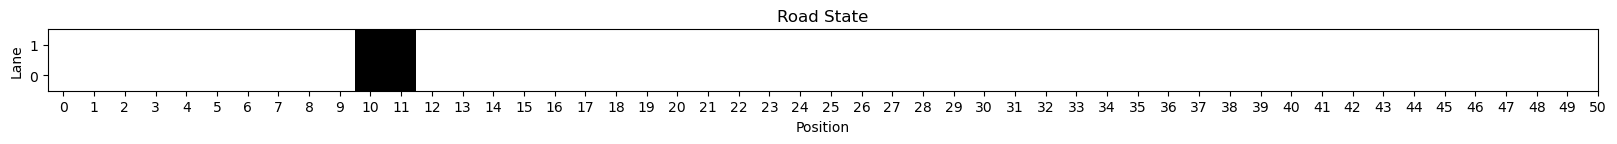

Vehicles:
Position: 10, Speed: 3, Length:2



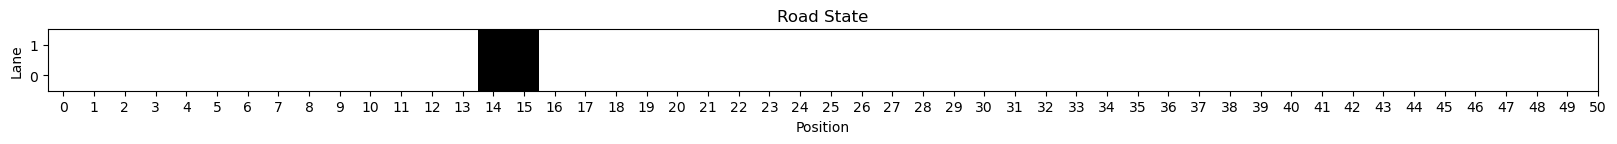

Vehicles:
Position: 14, Speed: 4, Length:2



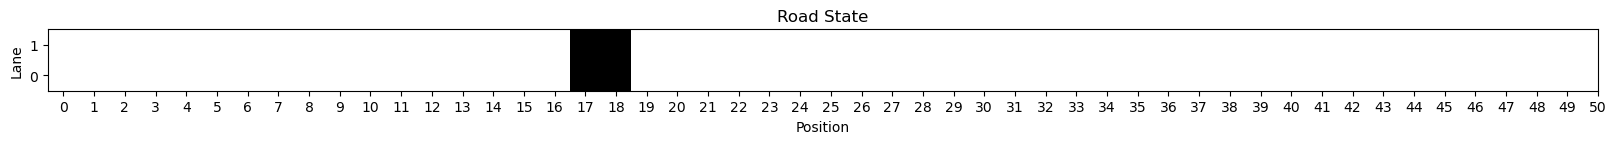

Vehicles:
Position: 17, Speed: 3, Length:2



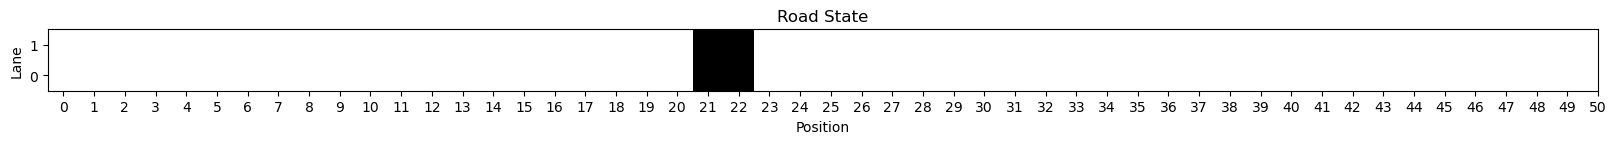

Vehicles:
Position: 21, Speed: 4, Length:2



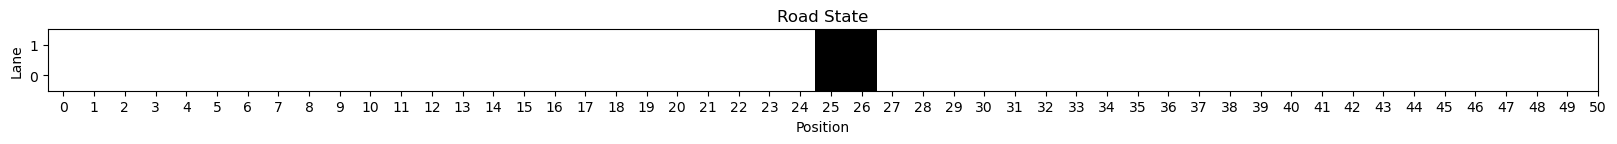

Vehicles:
Position: 25, Speed: 4, Length:2



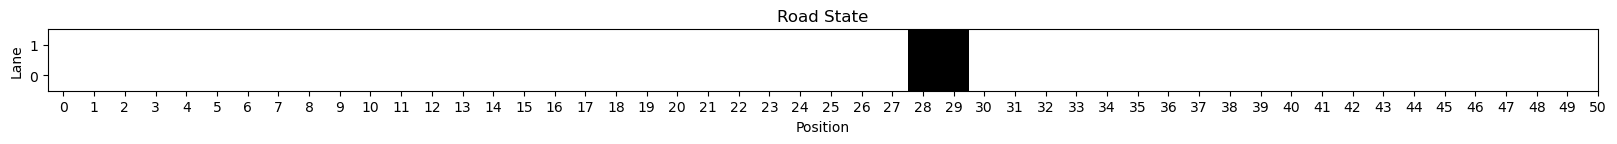

Vehicles:
Position: 28, Speed: 3, Length:2



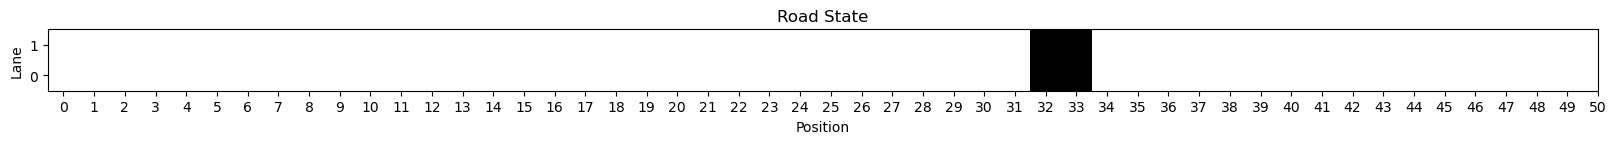

Vehicles:
Position: 32, Speed: 4, Length:2



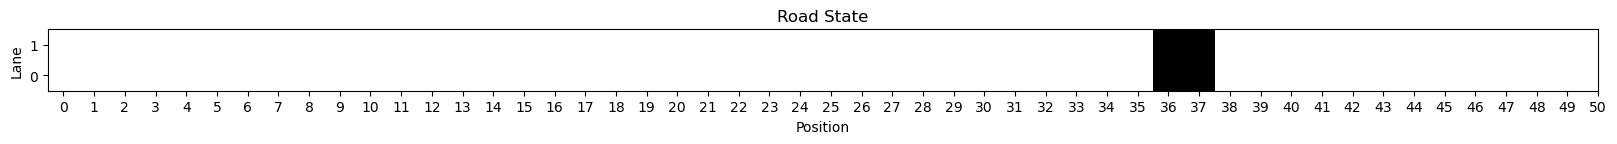

Vehicles:
Position: 36, Speed: 4, Length:2



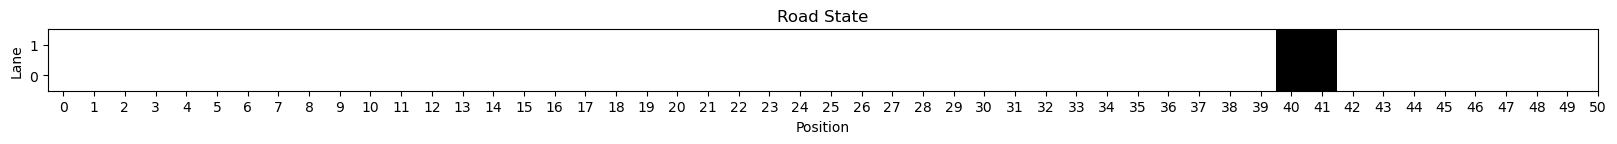

Vehicles:
Position: 40, Speed: 4, Length:2



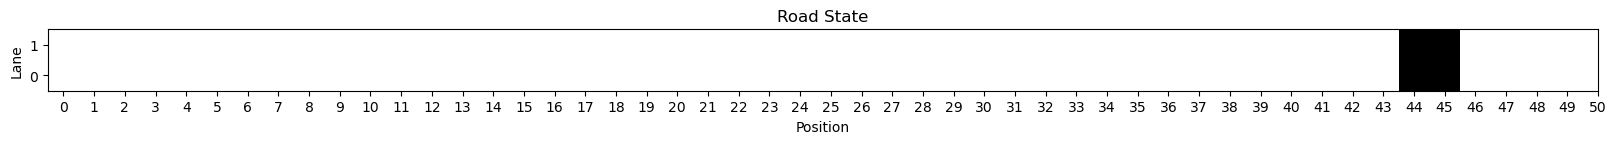

Vehicles:
Position: 44, Speed: 4, Length:2



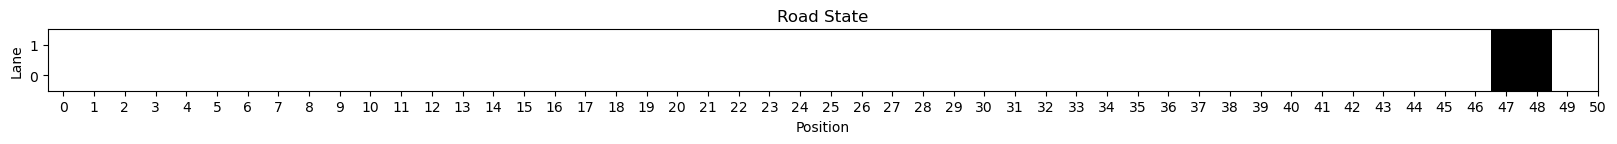

Vehicles:
Position: 47, Speed: 3, Length:2



In [136]:
#Not a 2D Spatio-Temporal Plot Yet
def visualize_road(road_state):
    plt.figure(figsize=(20,2))
    plt.imshow(road_state.T, cmap='Greys', origin='lower')
    plt.xlabel('Position')
    plt.xticks(np.arange(0,51,1))
    plt.ylabel('Lane')
    plt.yticks(np.arange(0,2,1))
    plt.title('Road State')
    plt.show()


# Initialize road
road_length = 50
road_width = 2
max_speed = 5
production_prob = 0.9

road = Road(road_length, road_width, max_speed, production_prob)

# Simulate road for 10 time steps
for _ in range(100):
    road.update()
    road_state = road.get_road_state()
    visualize_road(road_state)

    print("Vehicles:")
    for vehicle in road.vehicles:
        print(f"Position: {vehicle.position}, Speed: {vehicle.speed}, Length:{vehicle.length}")

    print()

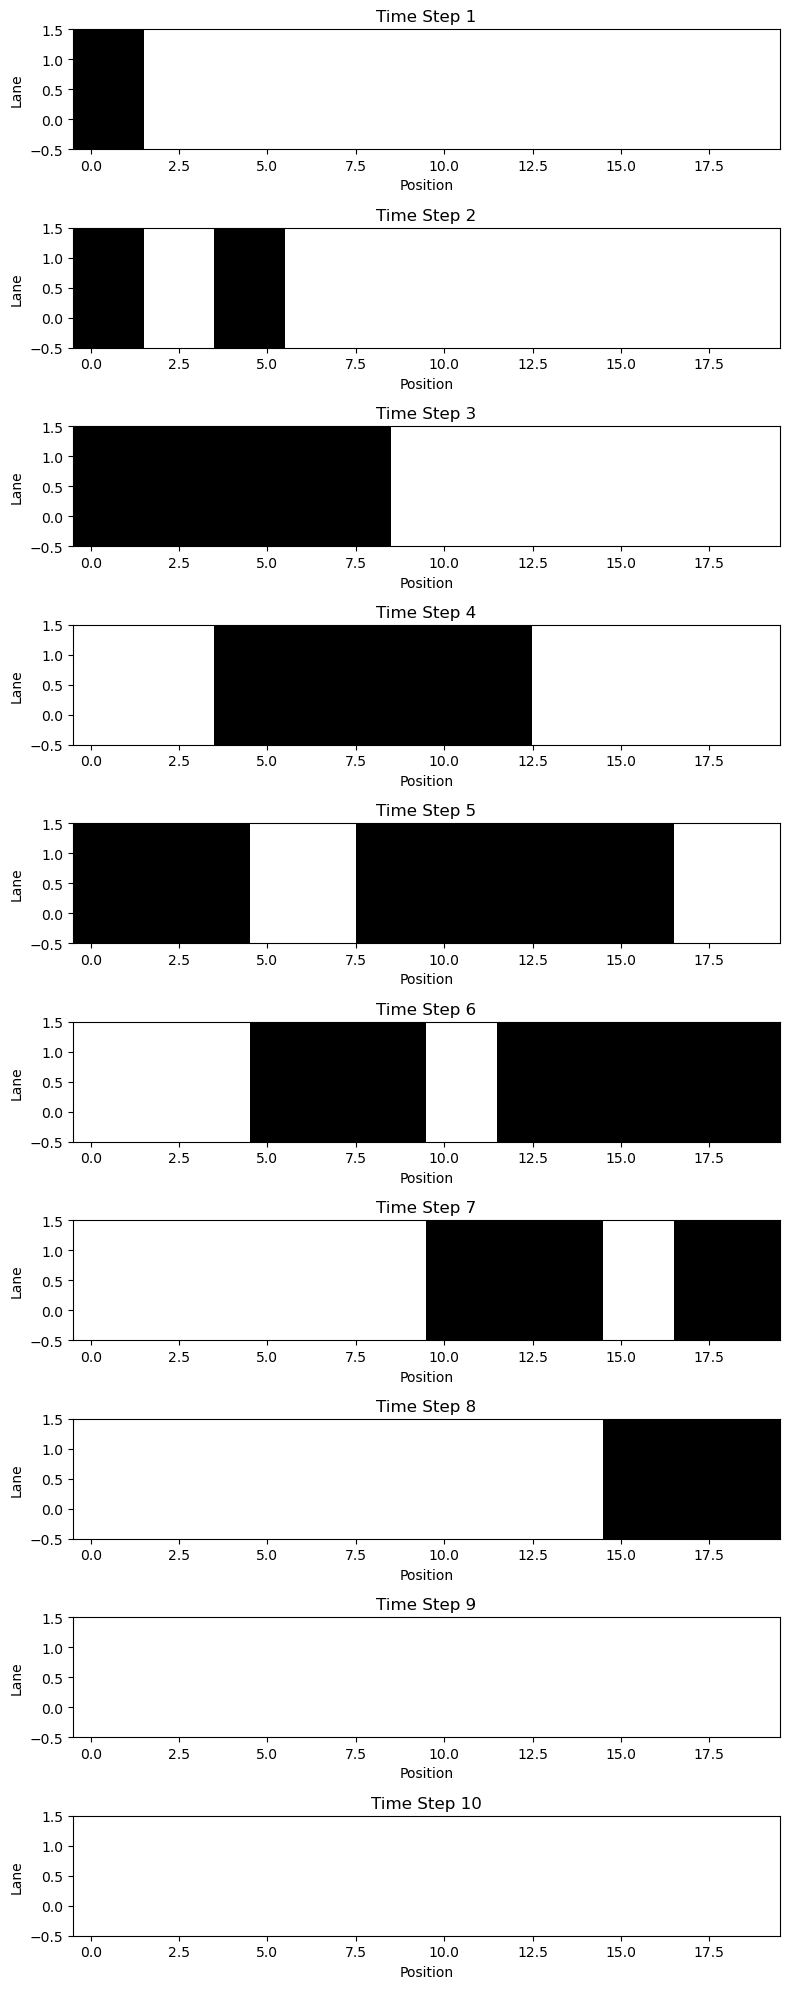

In [95]:
def visualize_road(road_states):
    plt.figure(figsize=(8, len(road_states) * 2))
    for i, road_state in enumerate(road_states):
        plt.subplot(len(road_states), 1, i + 1)
        plt.imshow(road_state.T, cmap='Greys', origin='lower', aspect='auto', interpolation='nearest')
        plt.title(f'Time Step {i+1}')
        plt.xlabel('Position')
        plt.ylabel('Lane')
    plt.tight_layout()
    plt.show()


# Initialize road
road_length = 20
road_width = 2
max_speed = 5
production_prob = 0.8

road = Road(road_length, road_width, max_speed, production_prob)
road_states = []

# Simulate road for 10 time steps
for _ in range(10):
    road.update()
    road_state = road.get_road_state()
    road_states.append(road_state)

visualize_road(road_states)

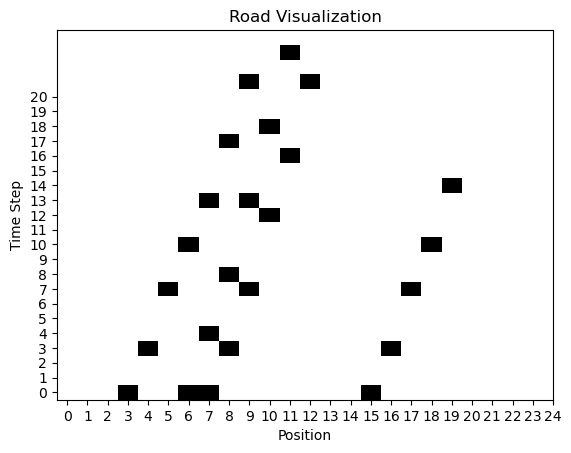

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2

Vehicles:
Position: 18, Speed: 4, Length:2



In [107]:
def visualize(self):
        road_state = np.zeros((20, self.length))
        for timestep in range(20):
            for vehicle in road.vehicles:
                road_state[timestep, vehicle.position] = 1
            road.update()

        
        plt.imshow(road_state.T, cmap='binary', aspect='auto', origin='lower')
        plt.xticks(range(self.length))
        plt.yticks(range(0, 21, 1))
        plt.xlabel('Position')
        plt.ylabel('Time Step')
        plt.title('Road Visualization')
        plt.show()

# Example usage
road_length = 25
road_width = 2
max_speed = 5
production_prob = 0.4
road = Road(road_length, road_width, max_speed, production_prob)
visualize(road)

for timestep in range(20):
    print("Vehicles:")
    for vehicle in road.vehicles:
        print(f"Position: {vehicle.position}, Speed: {vehicle.speed}, Length:{vehicle.length}")

    print()

#STILL WRONG, BUT WILL CONTINUE LATER EVENING

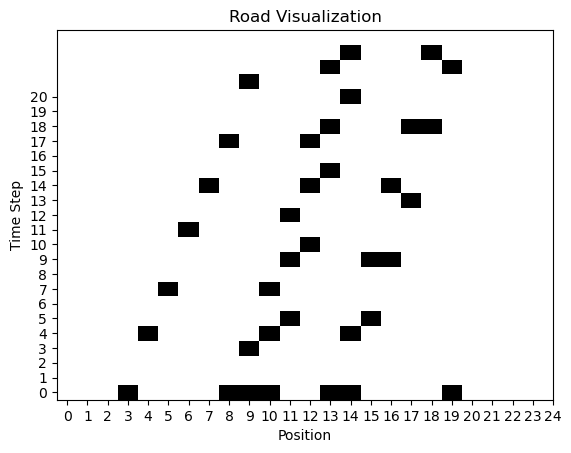

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep0

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep1

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep2

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep3

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep4

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep5

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep6

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep7

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep8

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep9

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep10

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep11

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep12

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep13

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep14

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep15

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep16

Vehicles:
Position: 1, Speed: 1, Length:9, Timestep17

Vehicles:
Position: 

In [108]:
def visualize(self):
        road_state = np.zeros((20, self.length))
        for timestep in range(20):
            for vehicle in road.vehicles:
                road_state[timestep, vehicle.position] = 1
            road.update()

        
        plt.imshow(road_state.T, cmap='binary', aspect='auto', origin='lower')
        plt.xticks(range(self.length))
        plt.yticks(range(0, 21, 1))
        plt.xlabel('Position')
        plt.ylabel('Time Step')
        plt.title('Road Visualization')
        plt.show()

# Example usage
road_length = 25
road_width = 2
max_speed = 5
production_prob = 0.4
road = Road(road_length, road_width, max_speed, production_prob)
visualize(road)

for timestep in range(20):
    print("Vehicles:")
    for vehicle in road.vehicles:
        print(f"Position: {vehicle.position}, Speed: {vehicle.speed}, Length:{vehicle.length}, Timestep{timestep}")

    print()

#STILL WRONG, BUT WILL CONTINUE LATER EVENING

In [1]:
import os

# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: /home/jovyan/Thesis Files/Modelling Traffic Flow through Nagel-Schreckenberg Model/Simple Road Models/Four Road Types/Produce-Evaporate
